In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob,tqdm
from ipywidgets import interact
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df=pd.read_excel("../data/processing_data_ot_playtime_rating_schedule.xlsx")
print(df.shape)
df.head()

(37368, 20)


,timestemp,month,day,hour,minute,dayofweek,week,schedule_day,schedule_week,playtime,uniquecode,productcode,productname,category,small_category,rating,price,profit,ot,quantity
0,2019-01-01 06:00:00,1,1,6,0,1,1,1,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.0,39900,2099000,0,53
1,2019-01-01 06:00:00,1,1,6,0,1,1,1,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.0,39900,4371000,0,110
2,2019-01-01 06:20:00,1,1,6,20,1,1,1,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.0,39900,3262000,1,82
3,2019-01-01 06:20:00,1,1,6,20,1,1,1,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.0,39900,6955000,1,174
4,2019-01-01 06:40:00,1,1,6,40,1,1,1,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.0,39900,6672000,2,167


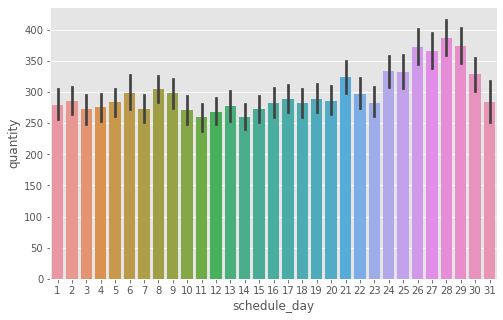

In [3]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["schedule_day"],y=df["quantity"])

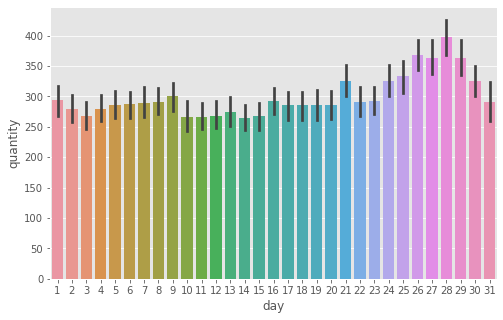

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["day"],y=df["quantity"])

### 말일이 될수록 많이 팔린다. 왜? 말일이 될수록 많이 팔릴까?

그리고 정말 달별로 보았았을때, 말일이 사실일까? 아니면 2019년에는 말일에 휴일이 많았나? 공휴일이

In [20]:
def visualize_dist_by_month_at_the_same_time(df):
    def view_images(month):
        fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5))

        raw_data = df.loc[df['month'] == month]
        sns.barplot(x=raw_data["day"],y=raw_data["quantity"],ax=ax1)
        sns.barplot(x=raw_data["schedule_day"],y=raw_data["quantity"],ax=ax2)
        ax1.set_title(f'일반적인 Day, month : {month}')
        ax2.set_title(f'스케줄형식인 Day, month : {month}')
    interact(view_images, month=(1, 13))

In [22]:
df.category.unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

In [19]:
visualize_dist_by_month_at_the_same_time(df)

interactive(children=(IntSlider(value=7, description='month', max=13, min=1), Output()), _dom_classes=('widget…

In [24]:
category_dict = { 0:'의류',
                  1:'속옷',
                  2:'주방',
                  3:'농수축',
                  4:'이미용',
                  5:'가전',
                  6:'생활용품',
                  7:'건강기능',
                  8:'잡화',
                  9:'가구',
                  10:'침구'}

In [38]:
def visualize_dist_by_category_at_the_same_time(df):
    def view_images(month,category):
        fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(15,12))

        raw_data = df.loc[df['month'] == month]
        sns.barplot(x=raw_data["day"],y=raw_data["quantity"],ax=ax1)
        
        cate_data = raw_data.loc[raw_data['category'] == category_dict[category]]
        sns.barplot(x=cate_data["day"],y=cate_data["quantity"],ax=ax2)
        

        ax1.set_title(f'일반적인 Day, month : {month}')
        ax2.set_title(f'일반적인 Day, 카테고리 : {category_dict[category]}')
    interact(view_images, month=(1, 13),category=(0,11))

In [43]:
visualize_dist_by_category_at_the_same_time(df)

interactive(children=(IntSlider(value=7, description='month', max=13, min=1), IntSlider(value=5, description='…

# 전혀 일별로 영향을 끼치는 것 같지가 않다.

In [65]:
def visualize_dist_by_hour_category(df):
    def view_images(day,category):
        fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(15,12))
        raw_data = df.loc[df['schedule_day'] == day]
        sns.barplot(x=raw_data["hour"],y=raw_data["quantity"],ax=ax1)
        
        cate_data = raw_data.loc[raw_data['category'] == category_dict[category]]
        sns.barplot(x=cate_data["hour"],y=cate_data["quantity"],ax=ax2)
        

        ax1.set_title(f'일반적인 Day, day : {day}')
        ax2.set_title(f'일반적인 Day, 카테고리 : {category_dict[category]}')
    interact(view_images, day=(1, 31),category=(0,11))

In [66]:
visualize_dist_by_hour_category(df)

interactive(children=(IntSlider(value=16, description='day', max=31, min=1), IntSlider(value=5, description='c…

In [70]:
df[(df["schedule_day"]==28) & (df["category"]=="가전")]

,timestemp,month,day,hour,minute,dayofweek,week,schedule_day,schedule_week,playtime,uniquecode,productcode,productname,category,small_category,rating,price,profit,ot,quantity
5663,2019-02-28 21:00:00,2,28,21,0,3,9,28,9,20,100148,200500,일시불 LG 울트라HD TV 55UK6800HNC,가전,TV,0.043,1300000,50000,0,0
5664,2019-02-28 21:00:00,2,28,21,0,3,9,28,9,20,100148,200433,무이자 LG 울트라HD TV 55UK6800HNC,가전,TV,0.043,1440000,3726000,0,3
5665,2019-02-28 21:00:00,2,28,21,0,3,9,28,9,20,100148,200509,일시불 LG 울트라HD TV 65UK6800HNC,가전,TV,0.043,1900000,4908000,0,3
5666,2019-02-28 21:00:00,2,28,21,0,3,9,28,9,20,100148,200442,무이자 LG 울트라HD TV 65UK6800HNC,가전,TV,0.043,2130000,16398000,0,8
5667,2019-02-28 21:00:00,2,28,21,0,3,9,28,9,20,100148,200516,일시불 LG 울트라HD TV 70UK6800HNC,가전,TV,0.043,2700000,50000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28324,2019-09-28 22:00:00,9,28,22,0,5,39,28,39,20,100148,200528,일시불 LG 울트라HD TV 75UM7900BNA,가전,TV,0.238,2750000,19178000,2,7
28325,2019-09-28 22:00:00,9,28,22,0,5,39,28,39,20,100148,200460,무이자 LG 울트라HD TV 75UM7900BNA,가전,TV,0.238,2990000,13919000,2,5
34152,2019-11-28 18:20:00,11,28,18,20,3,48,28,48,20,100091,200249,(1등급)221L_딤채김치냉장고(LDL22DHWJJ),가전,냉장고,0.000,899000,24950000,0,28
34153,2019-11-28 18:40:00,11,28,18,40,3,48,28,48,20,100091,200249,(1등급)221L_딤채김치냉장고(LDL22DHWJJ),가전,냉장고,0.000,899000,47717000,1,53


In [82]:
df[df["productname"].str.contains("221L_딤채김치냉장고")]["quantity"]

31491     25
31492     70
31493     86
31794      6
31796     17
32278      3
32280     36
32437      8
32438     72
32439     94
32455     11
32456     36
32519     14
32520     22
32635     17
32637     33
32804     36
32805    100
32806    122
33001     11
33003     30
33170     45
33171    189
34152     28
34153     53
34154     70
34333     28
34334     50
34335     96
34336     75
34891     33
34892     30
34893     56
35417     53
35418     92
35419     93
Name: quantity, dtype: int64

In [85]:
df[df["productname"].str.contains("김치냉장고")][["price","quantity"]]

,price,quantity
26448,2599000,8
26449,2599000,11
26450,2599000,8
27357,2599000,6
27358,2599000,3
27359,2599000,22
28668,2599000,8
28669,2599000,11
28670,2599000,20
31491,899000,25


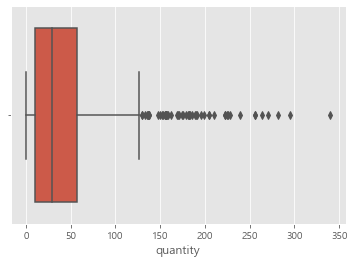

In [90]:
sns.boxplot(df[(df["category"]=="가전")&(df["price"]<1000000)]["quantity"])

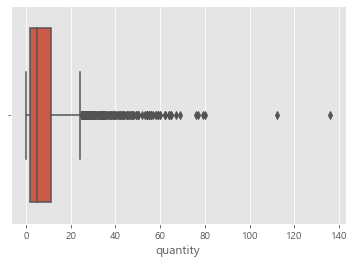

In [89]:
sns.boxplot(df[(df["category"]=="가전")&(df["price"]>1000000)]["quantity"])

In [97]:
np.percentile(df[(df["category"]=="가전")]["price"],30)

1200000.0

899000.0


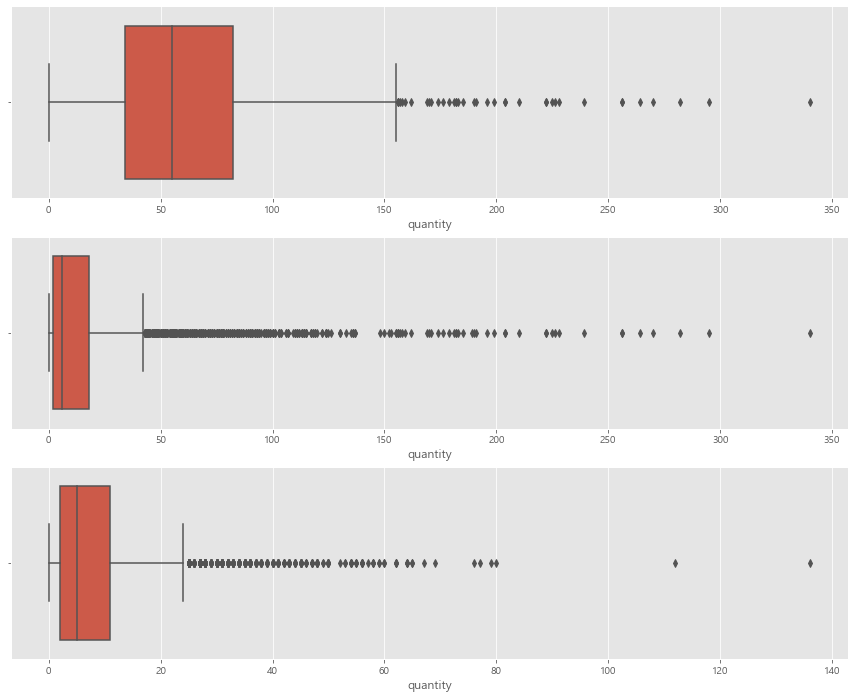

In [116]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(15,12))
base_price_10=np.percentile(df[(df["category"]=="가전")]["price"],10)
base_price_30=np.percentile(df[(df["category"]=="가전")]["price"],20)
print(base_price_30)
# base_price_10=np.percentile(df[(df["category"]=="가전")]["price"],10)
sns.boxplot(df[(df["category"]=="가전")&(df["price"]<=base_price_10)]["quantity"],ax=ax1)
sns.boxplot(df[(df["category"]=="가전")&((df["price"]>base_price_10) | (df["price"]<=base_price_30))]["quantity"],ax=ax2)
sns.boxplot(df[(df["category"]=="가전")&(df["price"]>base_price_30)]["quantity"],ax=ax3)

In [128]:
category_dict.values()

dict_values(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구', '침구'])

59900.0 69900.0


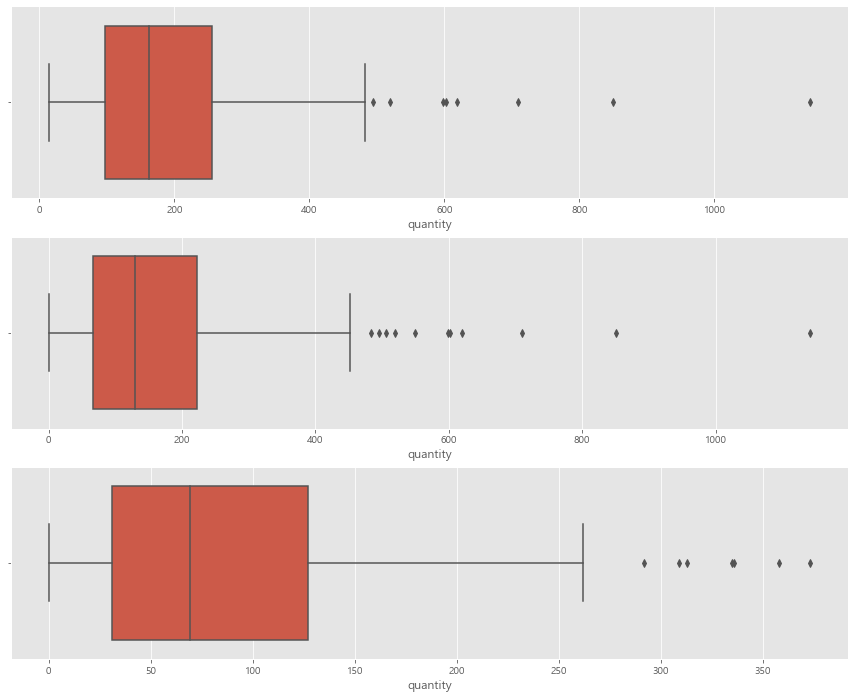

In [136]:
cate_name="침구"

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(15,12))
base_price_10=np.percentile(df[(df["category"]==cate_name)]["price"],20)
base_price_30=np.percentile(df[(df["category"]==cate_name)]["price"],60)
print(base_price_10,base_price_30)
# base_price_10=np.percentile(df[(df["category"]=="가전")]["price"],10)
sns.boxplot(df[(df["category"]==cate_name)&(df["price"]<=base_price_10)]["quantity"],ax=ax1)
sns.boxplot(df[(df["category"]==cate_name)&((df["price"]>base_price_10) | (df["price"]<=base_price_30))]["quantity"],ax=ax2)
sns.boxplot(df[(df["category"]==cate_name)&(df["price"]>base_price_30)]["quantity"],ax=ax3)

## 카테고리별로 가격대의 퍼센트로 카테고리 별로 해당 카테고리가 비싼 여부를 퍼센테이지로 맵핑한다.

### 최종 파생변수로. 카테고리 & 맵핑한 퍼센트 비율 가격을 조합해 카테고리 별 비싼 가격 맵핑이라는 컬럼을 만든다.